# Proyecto Final - Analisis del Consumo Energetico Domiciliario
## Grupo 2

### Alcance
##### 1- Normalizar los datos (fede,angel,andrea)
##### 2.1- Sumar datos de climas (fede)
##### 2.2- Sumar datos de costos (angel)
##### 2.3- Analitica completa de los datos (andrea,angel)
##### 3- Forecast el consumo con ML (fede)
##### 6- Visualizacion en BI (angel)
##### 4- Plotear datos en mapas (angel)

### EDA - Analisis Exploratorio de Datos

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
ruta_archivo = ".\Dataset\household_power_consumption.csv"
df = pd.read_csv(ruta_archivo)

#### 1. Global_active_power
Descripción: Representa la potencia activa global consumida por todos los aparatos eléctricos conectados en la red durante un intervalo de tiempo.
Unidad de medida: Kilovatios (kW).
Relevancia: Es uno de los valores clave para medir el consumo total de electricidad de un hogar o instalación. Se utiliza en el cálculo de facturas de electricidad y para el análisis de eficiencia energética.
#### 2. Global_reactive_power
Descripción: Representa la potencia reactiva global utilizada. La potencia reactiva no realiza trabajo útil, pero es necesaria para mantener los campos eléctricos en dispositivos como motores y transformadores.
Unidad de medida: Kilovoltio-amperios reactivos (kVAR).
Relevancia: Aunque no contribuye directamente al consumo útil, una alta potencia reactiva puede indicar ineficiencias en el uso de energía eléctrica, lo que afecta el rendimiento general de un sistema eléctrico.
#### 3. Voltage
Descripción: Representa el voltaje eléctrico (o tensión) medido en la red eléctrica del sistema.
Unidad de medida: Voltios (V).
Relevancia: Un voltaje constante y adecuado es crucial para el correcto funcionamiento de los dispositivos eléctricos. Variaciones significativas pueden indicar problemas en la red eléctrica o en el suministro.
#### 4. Global_intensity
Descripción: Representa la corriente eléctrica total (intensidad) medida en el circuito.
Unidad de medida: Amperios (A).
Relevancia: Este campo está relacionado directamente con el consumo total de electricidad, ya que la corriente (A) multiplicada por el voltaje (V) da como resultado la potencia total.
#### 5. Sub_metering_1
Descripción: Representa la energía activa consumida en una parte específica de la instalación eléctrica (medida en un submedidor). En este caso, corresponde a la cocina, incluyendo electrodomésticos como hornos, microondas, etc.
Unidad de medida: Vatios-hora (Wh).
Relevancia: Permite desglosar el consumo de energía por áreas o dispositivos específicos, ayudando a identificar patrones de consumo.
#### 6. Sub_metering_2
Descripción: Representa la energía activa consumida por un segundo submedidor, generalmente asociado al área de lavandería (lavadoras, secadoras, etc.).
Unidad de medida: Vatios-hora (Wh).
Relevancia: Ayuda a identificar el consumo específico en áreas de alto consumo energético, como la lavandería.
#### 7. Sub_metering_3
Descripción: Representa la energía activa consumida por un tercer submedidor, generalmente asignado al sistema de calefacción o aire acondicionado.
Unidad de medida: Vatios-hora (Wh).
Relevancia: Los sistemas de climatización suelen ser grandes consumidores de energía, por lo que este submedidor permite evaluar su impacto en el consumo general.




In [31]:
print(f"El dataset tiene {df.shape[0]} filas.")
print(f"El dataset tiene {df.shape[1]} columnas.")


El dataset tiene 1048575 filas.
El dataset tiene 9 columnas.


Las primeras filas

In [32]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0,1,17.0
1,16/12/2006,17:25:00,5.36,0.436,233.63,23,0,1,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23,0,2,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23,0,1,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0,1,17.0


Las ultimas filas

In [33]:
df.tail()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
1048570,13/12/2008,21:34:00,0.426,0.076,242.27,1.8,0,0,0.0
1048571,13/12/2008,21:35:00,0.424,0.076,242.1,1.8,0,0,0.0
1048572,13/12/2008,21:36:00,0.422,0.076,241.73,1.8,0,0,0.0
1048573,13/12/2008,21:37:00,0.422,0.078,242.56,1.8,0,0,0.0
1048574,13/12/2008,21:38:00,0.422,0.078,242.61,1.8,0,0,0.0


Informacion de la Columnas

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 9 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Date                   1048575 non-null  object 
 1   Time                   1048575 non-null  object 
 2   Global_active_power    1048575 non-null  object 
 3   Global_reactive_power  1048575 non-null  object 
 4   Voltage                1048575 non-null  object 
 5   Global_intensity       1048575 non-null  object 
 6   Sub_metering_1         1048575 non-null  object 
 7   Sub_metering_2         1048575 non-null  object 
 8   Sub_metering_3         1044506 non-null  float64
dtypes: float64(1), object(8)
memory usage: 72.0+ MB


In [35]:
print(df.dtypes)

Date                      object
Time                      object
Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object


Convertimos a los tipos de datos correctos

In [36]:
columnas_a_convertir = [
    'Global_active_power', 
    'Global_reactive_power', 
    'Voltage', 
    'Global_intensity', 
    'Sub_metering_1', 
    'Sub_metering_2', 
    'Sub_metering_3'
]

for col in columnas_a_convertir:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y', errors='coerce')
df['DateTime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'], errors='coerce')
df['Anho'] = df['Date'].dt.year
df['Mes'] = df['Date'].dt.month
df['Hora'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.hour
df['Dia_semana'] = df['Date'].dt.day_name()

Resumen Estadistico

In [37]:
df.describe()

,Date,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,DateTime,Anho,Mes,Hora
count,1048575,1.044506e+06,1.044506e+06,1.044506e+06,1.044506e+06,1.044506e+06,1.044506e+06,1.044506e+06,1048575,1.048575e+06,1.048575e+06,1.048575e+06
mean,2007-12-15 07:31:23.412059392,1.108202e+00,1.182732e-01,2.399598e+02,4.718123e+00,1.177451e+00,1.475177e+00,5.933837e+00,2007-12-15 19:31:00.000001792,2.007457e+03,6.498591e+00,1.150183e+01
min,2006-12-16 00:00:00,7.600000e-02,0.000000e+00,2.234900e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,2006-12-16 17:24:00,2.006000e+03,1.000000e+00,0.000000e+00
25%,2007-06-16 00:00:00,2.880000e-01,0.000000e+00,2.379700e+02,1.200000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2007-06-16 18:27:30,2.007000e+03,4.000000e+00,6.000000e+00
50%,2007-12-15 00:00:00,5.500000e-01,9.800000e-02,2.402100e+02,2.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2007-12-15 19:31:00,2.007000e+03,7.000000e+00,1.200000e+01
75%,2008-06-14 00:00:00,1.544000e+00,1.860000e-01,2.421400e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01,2008-06-14 20:34:30,2.008000e+03,9.000000e+00,1.800000e+01
max,2008-12-13 00:00:00,1.067000e+01,1.390000e+00,2.521400e+02,4.640000e+01,8.000000e+01,7.800000e+01,3.100000e+01,2008-12-13 21:38:00,2.008000e+03,1.200000e+01,2.300000e+01
std,NaN,1.129546e+00,1.095062e-01,3.284504e+00,4.763588e+00,6.321183e+00,6.352703e+00,8.210398e+00,NaN,5.385978e-01,3.439283e+00,6.922371e+00


Vemos que los valores tienen los tipos de datos correctos

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 14 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   Date                   1048575 non-null  datetime64[ns]
 1   Time                   1048575 non-null  object        
 2   Global_active_power    1044506 non-null  float64       
 3   Global_reactive_power  1044506 non-null  float64       
 4   Voltage                1044506 non-null  float64       
 5   Global_intensity       1044506 non-null  float64       
 6   Sub_metering_1         1044506 non-null  float64       
 7   Sub_metering_2         1044506 non-null  float64       
 8   Sub_metering_3         1044506 non-null  float64       
 9   DateTime               1048575 non-null  datetime64[ns]
 10  Anho                   1048575 non-null  int32         
 11  Mes                    1048575 non-null  int32         
 12  Hora                   10485

Valores Unicos y Frecuencias

In [39]:
print(df['Global_active_power'].value_counts())

Global_active_power
0.218    6714
0.216    6575
0.220    6410
0.222    6198
0.224    6052
         ... 
7.626       1
7.306       1
7.110       1
6.988       1
7.380       1
Name: count, Length: 4075, dtype: int64


Valores Faltantes

In [40]:
print(df.isnull().sum())

Date                        0
Time                        0
Global_active_power      4069
Global_reactive_power    4069
Voltage                  4069
Global_intensity         4069
Sub_metering_1           4069
Sub_metering_2           4069
Sub_metering_3           4069
DateTime                    0
Anho                        0
Mes                         0
Hora                        0
Dia_semana                  0
dtype: int64


Visualizar los registros con valores nulos

In [41]:
df_nulos = df[df.isnull().any(axis=1)]
df_nulos.count()

Date                     4069
Time                     4069
Global_active_power         0
Global_reactive_power       0
Voltage                     0
Global_intensity            0
Sub_metering_1              0
Sub_metering_2              0
Sub_metering_3              0
DateTime                 4069
Anho                     4069
Mes                      4069
Hora                     4069
Dia_semana               4069
dtype: int64

Existen 4069 registros con valores nulos los cuales no aportan al analisis. Validamos que solo las columnas de fecha cuentan con datos.
Procedemos a eliminar los registros.

In [42]:
#cantidad de registros antes de la eliminacion
df.shape

(1048575, 14)

Eliminamos todos los registros coindicentes con valores nulos

In [43]:
df = df[~df.index.isin(df_nulos.index)]
df.shape

(1044506, 14)

Valores Duplicados

In [44]:
print(df.duplicated().sum())
print("No hay registros duplicados")

0
No hay registros duplicados


Los registros del año 2006 no estan completos solo tenemos datos desde el 16 hasta el 31 diciembre, no son valores representativos.

In [47]:
#cantidad de registros antes de eliminar los registros del año 2006
df.shape

(1044506, 14)

In [49]:
#se van a eliminar 21992 registros
df.query("Anho == 2006").shape[0]

21992

In [51]:
# Se eliminaron los registros
df = df[df['Anho'] != 2006]
df.shape

(1022514, 14)

## Analisis EDA Visualizaciones

In [52]:
df

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,DateTime,Anho,Mes,Hora,Dia_semana
21996,2007-01-01,0:00:00,2.580,0.136,241.97,10.6,0.0,0.0,0.0,2007-01-01 00:00:00,2007,1,0,Monday
21997,2007-01-01,0:01:00,2.552,0.100,241.75,10.4,0.0,0.0,0.0,2007-01-01 00:01:00,2007,1,0,Monday
21998,2007-01-01,0:02:00,2.550,0.100,241.64,10.4,0.0,0.0,0.0,2007-01-01 00:02:00,2007,1,0,Monday
21999,2007-01-01,0:03:00,2.550,0.100,241.71,10.4,0.0,0.0,0.0,2007-01-01 00:03:00,2007,1,0,Monday
22000,2007-01-01,0:04:00,2.554,0.100,241.98,10.4,0.0,0.0,0.0,2007-01-01 00:04:00,2007,1,0,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2008-12-13,21:34:00,0.426,0.076,242.27,1.8,0.0,0.0,0.0,2008-12-13 21:34:00,2008,12,21,Saturday
1048571,2008-12-13,21:35:00,0.424,0.076,242.10,1.8,0.0,0.0,0.0,2008-12-13 21:35:00,2008,12,21,Saturday
1048572,2008-12-13,21:36:00,0.422,0.076,241.73,1.8,0.0,0.0,0.0,2008-12-13 21:36:00,2008,12,21,Saturday
1048573,2008-12-13,21:37:00,0.422,0.078,242.56,1.8,0.0,0.0,0.0,2008-12-13 21:37:00,2008,12,21,Saturday


Distribución de la energía activa global

c:\Users\federico.cano\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


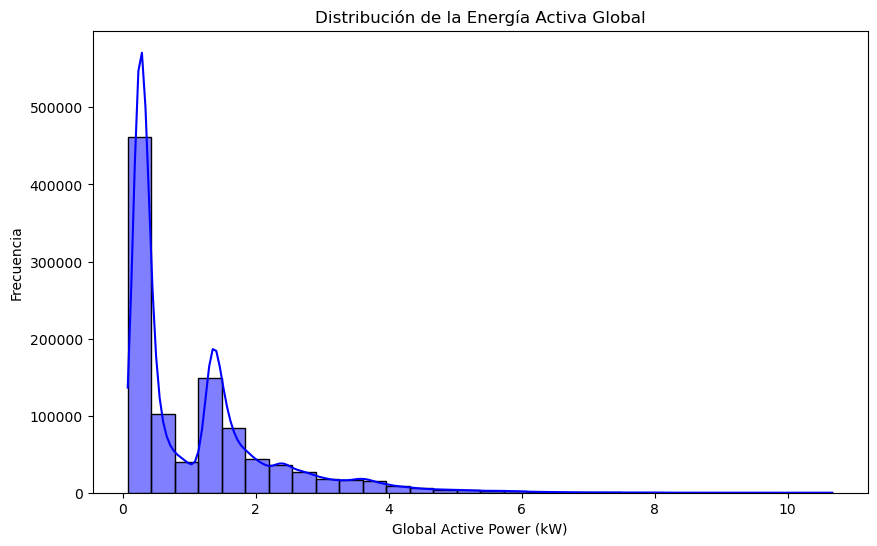

In [53]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Global_active_power'], kde=True, bins=30, color='blue')
plt.title('Distribución de la Energía Activa Global')
plt.xlabel('Global Active Power (kW)')
plt.ylabel('Frecuencia')
plt.show()

Tendencia mensual de la energía activa global

c:\Users\federico.cano\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\federico.cano\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


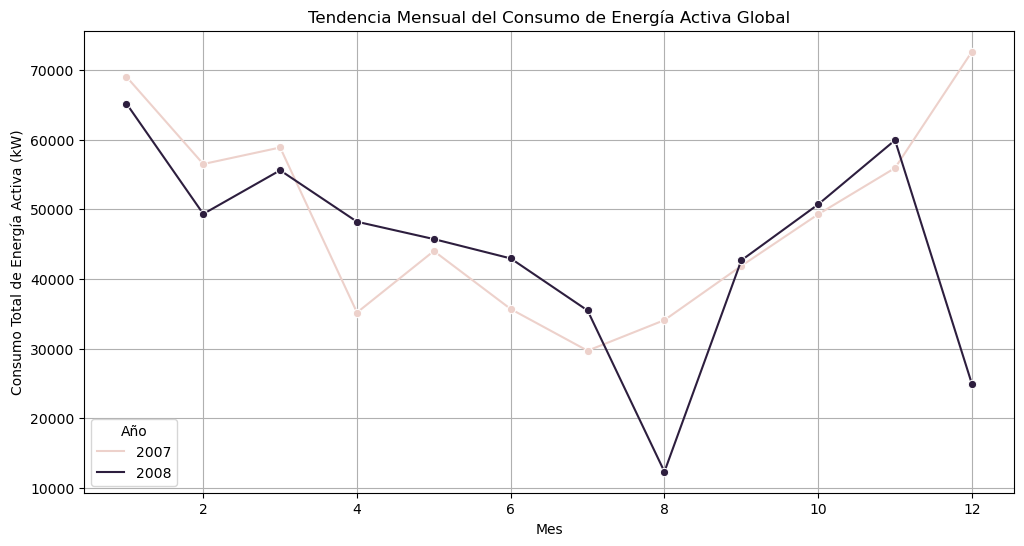

In [54]:
# Agrupar por año y mes y calcular la suma
df_monthly = df.groupby(['Anho', 'Mes'])['Global_active_power'].sum().reset_index()

# Crear un gráfico de líneas
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_monthly, x='Mes', y='Global_active_power', hue='Anho', marker='o')
plt.title('Tendencia Mensual del Consumo de Energía Activa Global')
plt.xlabel('Mes')
plt.ylabel('Consumo Total de Energía Activa (kW)')
plt.legend(title='Año')
plt.grid(True)
plt.show()

Analisis de voltaje por mes

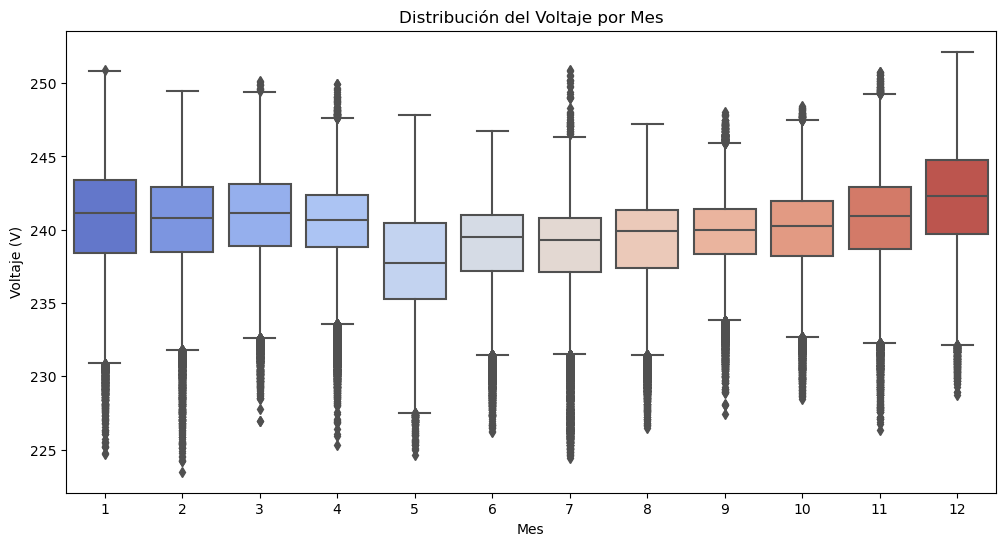

In [55]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Mes', y='Voltage', palette='coolwarm')
plt.title('Distribución del Voltaje por Mes')
plt.xlabel('Mes')
plt.ylabel('Voltaje (V)')
plt.show()


Relación entre energía activa y voltaje

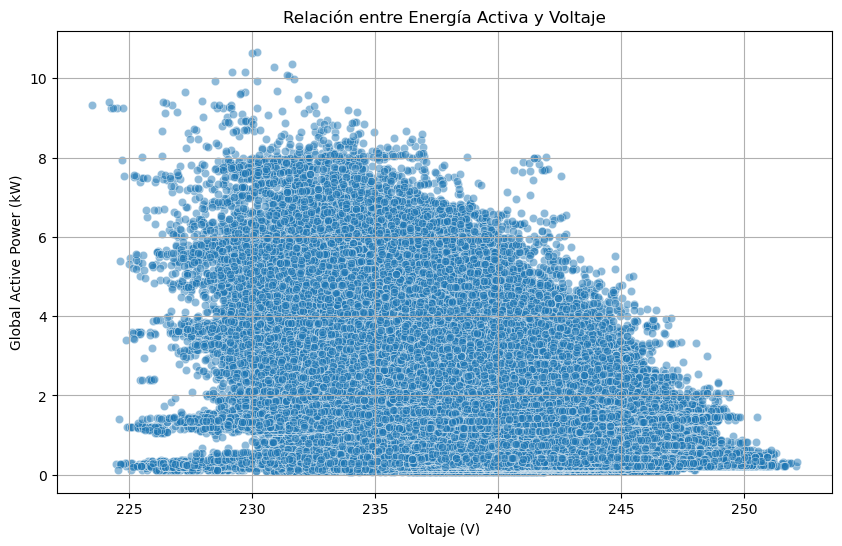

In [56]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Voltage', y='Global_active_power', alpha=0.5)
plt.title('Relación entre Energía Activa y Voltaje')
plt.xlabel('Voltaje (V)')
plt.ylabel('Global Active Power (kW)')
plt.grid(True)
plt.show()

Consumo por submedidores

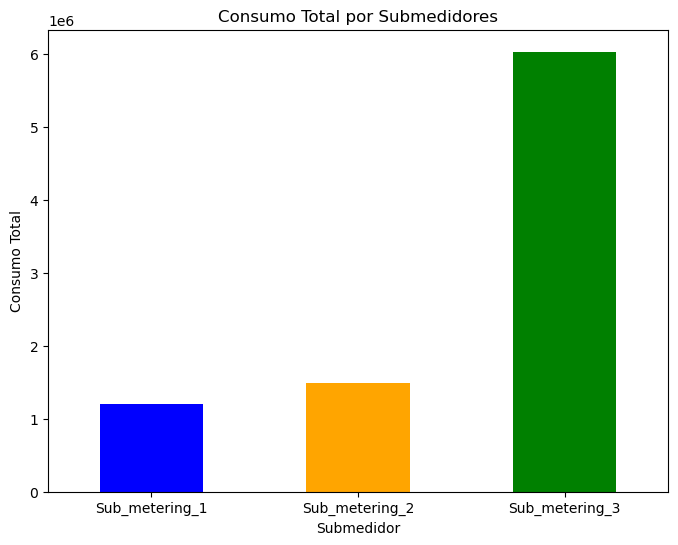

In [57]:
# Suma total de cada submedidor
sub_metering_totals = df[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].sum()

# Gráfico de barras
plt.figure(figsize=(8, 6))
sub_metering_totals.plot(kind='bar', color=['blue', 'orange', 'green'])
plt.title('Consumo Total por Submedidores')
plt.xlabel('Submedidor')
plt.ylabel('Consumo Total')
plt.xticks(rotation=0)
plt.show()

Consumo diario

c:\Users\federico.cano\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\federico.cano\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


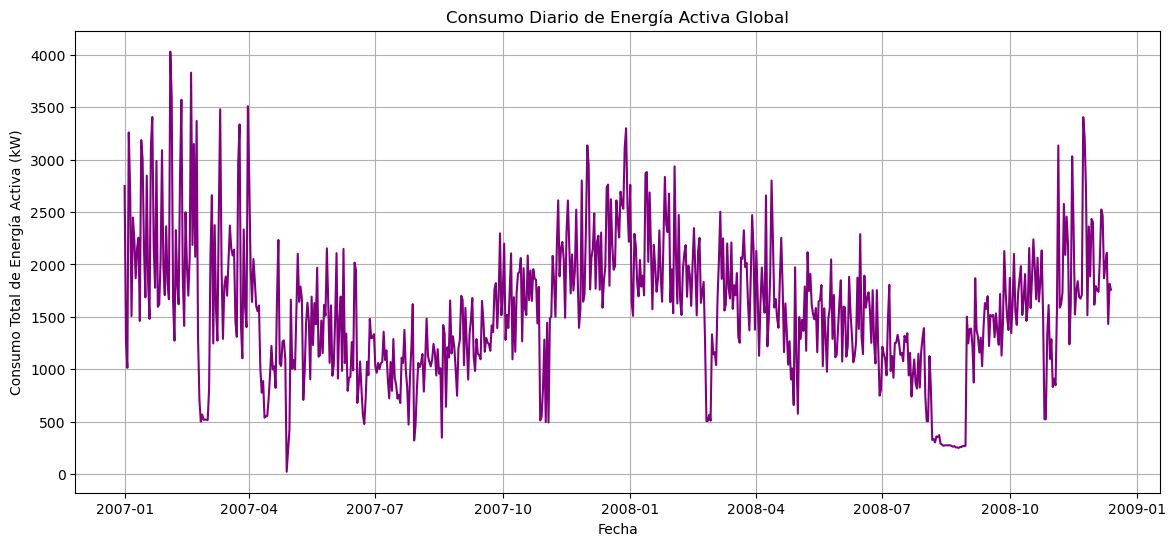

In [58]:
# Agrupar por fecha y calcular la suma
daily_consumption = df.groupby('Date')['Global_active_power'].sum().reset_index()

# Gráfico de líneas
plt.figure(figsize=(14, 6))
sns.lineplot(data=daily_consumption, x='Date', y='Global_active_power', color='purple')
plt.title('Consumo Diario de Energía Activa Global')
plt.xlabel('Fecha')
plt.ylabel('Consumo Total de Energía Activa (kW)')
plt.grid(True)
plt.show()

Distribución horaria del consumo de energía

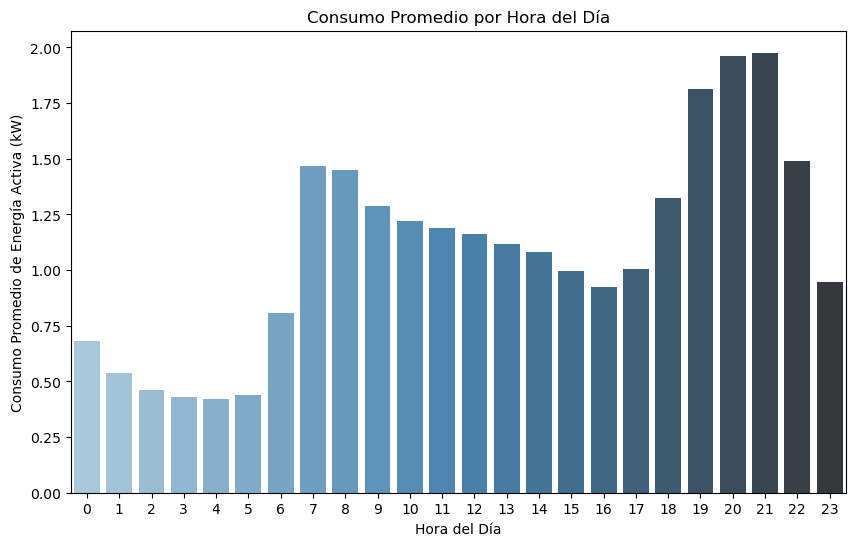

In [59]:
# Agrupar por hora y calcular el promedio
hourly_avg = df.groupby('Hora')['Global_active_power'].mean().reset_index()

# Gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(data=hourly_avg, x='Hora', y='Global_active_power', palette='Blues_d')
plt.title('Consumo Promedio por Hora del Día')
plt.xlabel('Hora del Día')
plt.ylabel('Consumo Promedio de Energía Activa (kW)')
plt.show()

In [60]:
df

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,DateTime,Anho,Mes,Hora,Dia_semana
21996,2007-01-01,0:00:00,2.580,0.136,241.97,10.6,0.0,0.0,0.0,2007-01-01 00:00:00,2007,1,0,Monday
21997,2007-01-01,0:01:00,2.552,0.100,241.75,10.4,0.0,0.0,0.0,2007-01-01 00:01:00,2007,1,0,Monday
21998,2007-01-01,0:02:00,2.550,0.100,241.64,10.4,0.0,0.0,0.0,2007-01-01 00:02:00,2007,1,0,Monday
21999,2007-01-01,0:03:00,2.550,0.100,241.71,10.4,0.0,0.0,0.0,2007-01-01 00:03:00,2007,1,0,Monday
22000,2007-01-01,0:04:00,2.554,0.100,241.98,10.4,0.0,0.0,0.0,2007-01-01 00:04:00,2007,1,0,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2008-12-13,21:34:00,0.426,0.076,242.27,1.8,0.0,0.0,0.0,2008-12-13 21:34:00,2008,12,21,Saturday
1048571,2008-12-13,21:35:00,0.424,0.076,242.10,1.8,0.0,0.0,0.0,2008-12-13 21:35:00,2008,12,21,Saturday
1048572,2008-12-13,21:36:00,0.422,0.076,241.73,1.8,0.0,0.0,0.0,2008-12-13 21:36:00,2008,12,21,Saturday
1048573,2008-12-13,21:37:00,0.422,0.078,242.56,1.8,0.0,0.0,0.0,2008-12-13 21:37:00,2008,12,21,Saturday


Análisis de la intensidad global

c:\Users\federico.cano\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


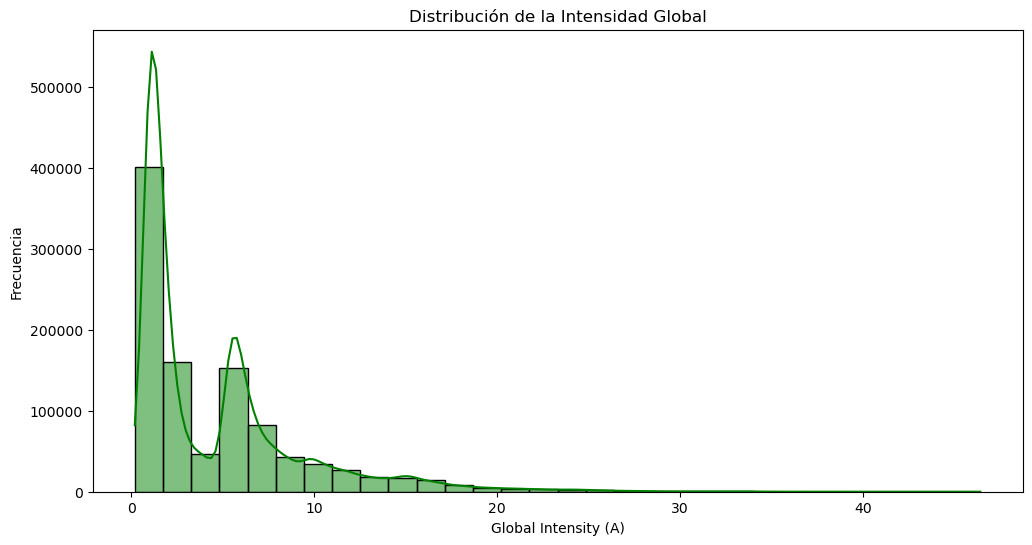

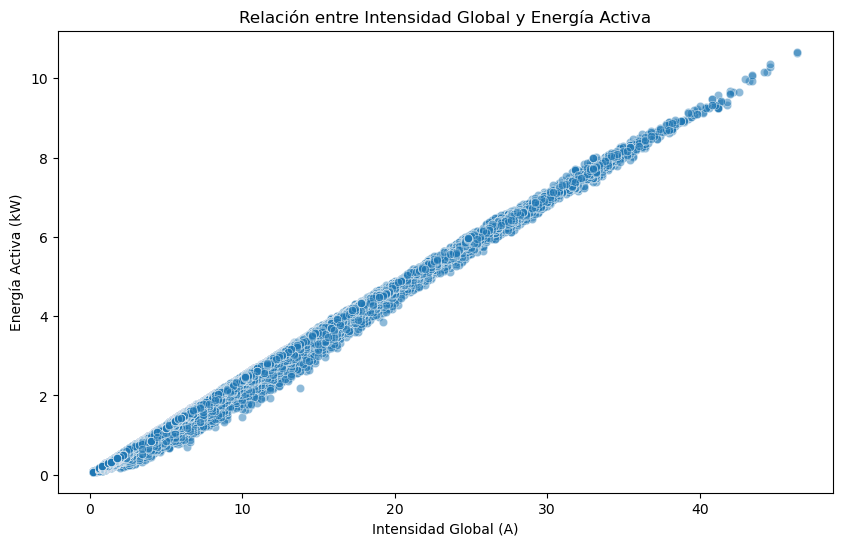

In [61]:
plt.figure(figsize=(12, 6))

# Distribución
sns.histplot(df['Global_intensity'], kde=True, bins=30, color='green')
plt.title('Distribución de la Intensidad Global')
plt.xlabel('Global Intensity (A)')
plt.ylabel('Frecuencia')
plt.show()

# Relación con la energía activa
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Global_intensity', y='Global_active_power', alpha=0.5)
plt.title('Relación entre Intensidad Global y Energía Activa')
plt.xlabel('Intensidad Global (A)')
plt.ylabel('Energía Activa (kW)')
plt.show()

Correlacion entre campos numericos

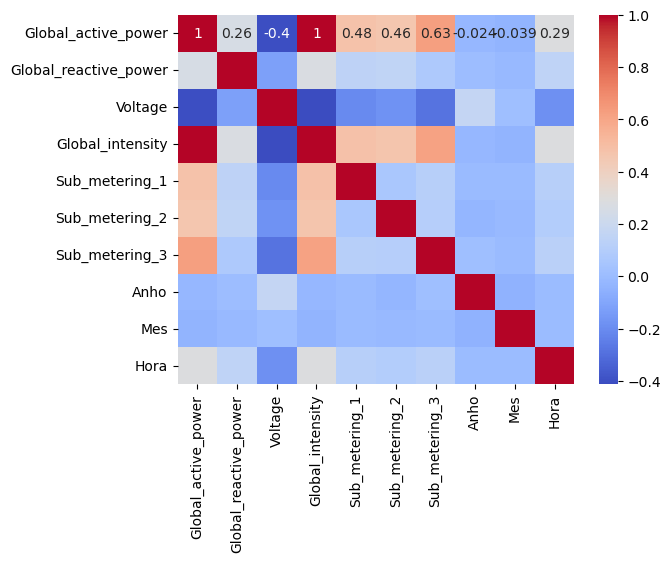

In [68]:
# Mapa de calor
df_numerico = df.select_dtypes(include=['number']) #tomamos las columnas numericas
sns.heatmap(df_numerico.corr(), annot=True, cmap='coolwarm')
plt.show()

Guardamos nuestro dataframe transformado

In [69]:
df.to_csv(".\Dataset\household_power_consumption_transfor_v2.csv", index=False, encoding='utf-8')

##### HABLEMOS DE COSTOS
##### DATOS DE COSTOS 
##### VARIABLES MONETARIAS
##### ESTRATIFICACION DE COSTOS
##### Podemos comparar el costo de ESE hogar
##### COMPARACIONES CON EL ULTIMO CENSO NACIONAL 2022
##### Si por ejemplo es nivel residencial, social o industrial

##### TENER ENCUENTA LA ARQUITECTURA

In [65]:
df

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,DateTime,Anho,Mes,Hora,Dia_semana
21996,2007-01-01,0:00:00,2.580,0.136,241.97,10.6,0.0,0.0,0.0,2007-01-01 00:00:00,2007,1,0,Monday
21997,2007-01-01,0:01:00,2.552,0.100,241.75,10.4,0.0,0.0,0.0,2007-01-01 00:01:00,2007,1,0,Monday
21998,2007-01-01,0:02:00,2.550,0.100,241.64,10.4,0.0,0.0,0.0,2007-01-01 00:02:00,2007,1,0,Monday
21999,2007-01-01,0:03:00,2.550,0.100,241.71,10.4,0.0,0.0,0.0,2007-01-01 00:03:00,2007,1,0,Monday
22000,2007-01-01,0:04:00,2.554,0.100,241.98,10.4,0.0,0.0,0.0,2007-01-01 00:04:00,2007,1,0,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2008-12-13,21:34:00,0.426,0.076,242.27,1.8,0.0,0.0,0.0,2008-12-13 21:34:00,2008,12,21,Saturday
1048571,2008-12-13,21:35:00,0.424,0.076,242.10,1.8,0.0,0.0,0.0,2008-12-13 21:35:00,2008,12,21,Saturday
1048572,2008-12-13,21:36:00,0.422,0.076,241.73,1.8,0.0,0.0,0.0,2008-12-13 21:36:00,2008,12,21,Saturday
1048573,2008-12-13,21:37:00,0.422,0.078,242.56,1.8,0.0,0.0,0.0,2008-12-13 21:37:00,2008,12,21,Saturday


In [64]:
df = df.drop(['año', 'mes'], axis=1)

In [62]:
# Convertir columna a tipo fecha
df['Date'] = pd.to_datetime(df['Date'])

# Resumir por mes o año
df['año'] = df['Date'].dt.year
df['mes'] = df['Date'].dt.month

In [23]:
df.groupby('mes')['Global_active_power'].mean().plot(kind='line')
plt.show()

TypeError: agg function failed [how->mean,dtype->object]

Corelacion entre Campos